In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set default size for figures
plt.rcParams['figure.figsize'] = (16, 5)

In [3]:
# Load dataset
foodwaste = pd.read_csv('../datasets/clean/foodwaste.csv', index_col=0, header=0)
display(foodwaste.head())

,GeoAreaName,Value
0,Northern America (M49) and Europe (M49),15.7
1,Sub-Saharan Africa (M49),14.0
2,Latin America and the Caribbean (MDG=M49),11.6
3,Central Asia (M49) and Southern Asia (MDG=M49),20.7
4,Eastern Asia (M49) and South-eastern Asia (MDG...,7.8


### Bar chart

<ipython-input-4-7fe3b3a7943b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(foodwaste.GeoAreaName, rotation=90)


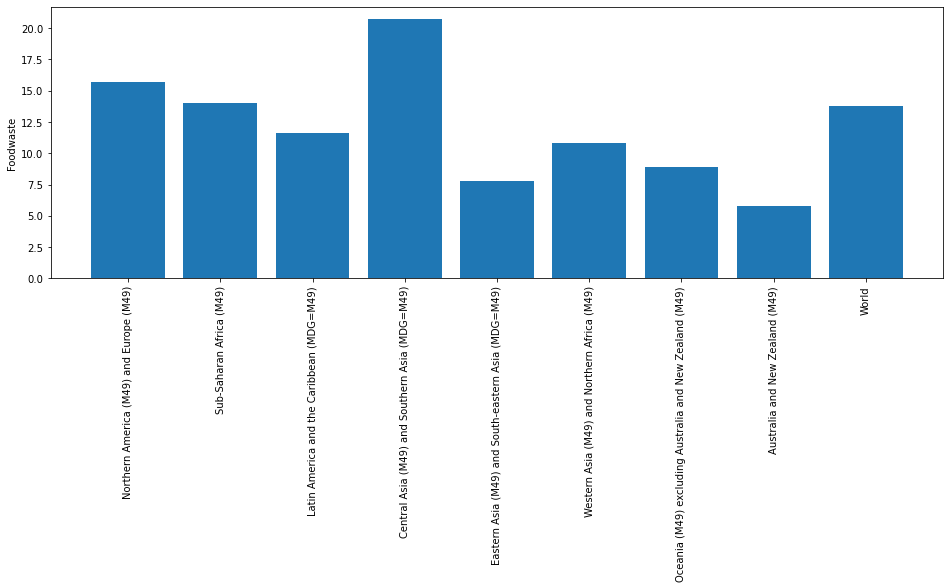

In [4]:
fig, ax = plt.subplots()

# Plot a bar-chart 
ax.bar(foodwaste.GeoAreaName, foodwaste.Value)

# Set the x-axis tick labels 
ax.set_xticklabels(foodwaste.GeoAreaName, rotation=90)

# Set the y-axis label
ax.set_ylabel("Foodwaste")

plt.show()

In [5]:
df = pd.read_csv('../datasets/clean/simpledf_applevalues.csv', index_col=0)
six = df.loc[1961:1969]
display(six.head())

,Br,Pt,Sp,UK
1961,19962.0,70000.0,385500.0,339000.0
1962,22600.0,58000.0,274500.0,583000.0
1963,23241.0,92000.0,480700.0,545000.0
1964,21158.0,85000.0,321600.0,653000.0
1965,40386.0,96000.0,446800.0,529000.0


<ipython-input-6-31ef79332632>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(six.index, rotation=70)


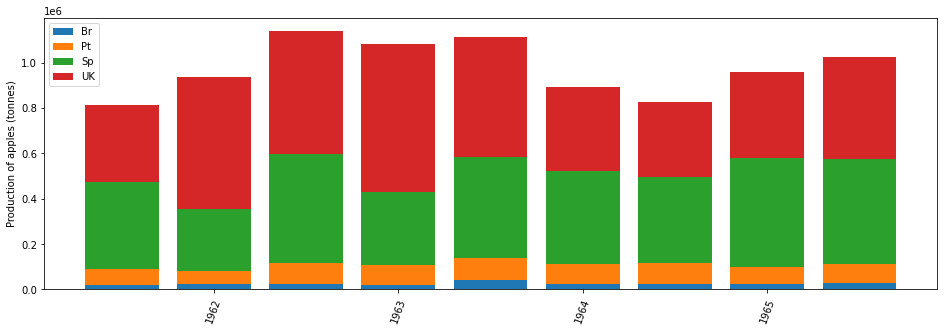

In [6]:
fig, ax = plt.subplots()

# Plot a bar-chart of production value as a function of year
ax.bar(six.index, six['Br'], label='Br')

# Set the x-axis tick labels to the country names
ax.set_xticklabels(six.index, rotation=70)

# Set the y-axis label
ax.set_ylabel("Production of apples (tonnes)")

# Stack bars for "Pt" on top with label "Pt"
ax.bar(six.index, six['Pt'], bottom=six['Br'], label='Pt')

# Stack bars for "Sp" on top of that with label "Sp"
ax.bar(six.index, six['Sp'], bottom=six['Br'] + six['Pt'], label='Sp')

# Stack bars for "UK" on top of that with label "UK"
ax.bar(six.index, six['UK'], bottom=six.Br + six['Pt'] + six.Sp, label='UK')

# Display the legend
ax.legend()

plt.show()

### Histogram

In [7]:
apples_prod = pd.read_csv('../datasets/clean/apples.csv', index_col=0, header=0)
display(apples_prod.head())

,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Belarus,Belgium,...,Western Europe,Oceania,Australia and New Zealand,European Union (28),European Union (27),Least Developed Countries,Land Locked Developing Countries,Small Island Developing States,Low Income Food Deficit Countries,Net Food Importing Developing Countries
1961,15100.0,10004.0,15400.0,415000.0,NaN,295034.0,456000.0,NaN,NaN,NaN,...,4142800.0,369434.0,369434.0,8362520.0,8023520.0,26100.0,35300.0,530.0,310300.0,126230.0
1962,15100.0,8039.0,14000.0,397000.0,NaN,326282.0,431000.0,NaN,NaN,NaN,...,8391400.0,419772.0,419772.0,12509286.0,11926286.0,26200.0,35500.0,535.0,303400.0,121556.0
1963,15100.0,7931.0,13000.0,474000.0,NaN,349571.0,436000.0,NaN,NaN,NaN,...,6006600.0,433571.0,433571.0,10951698.0,10406698.0,26300.0,35451.0,535.0,278700.0,137660.0
1964,18400.0,8498.0,12441.0,371000.0,NaN,367397.0,447000.0,NaN,NaN,NaN,...,6310800.0,476797.0,476797.0,11735102.0,11082102.0,30650.0,38907.0,540.0,250100.0,156225.0
1965,20400.0,8000.0,13151.0,544000.0,NaN,360002.0,222000.0,NaN,NaN,NaN,...,6156400.0,462902.0,462902.0,10717120.0,10188120.0,32700.0,42220.0,540.0,243200.0,156438.0


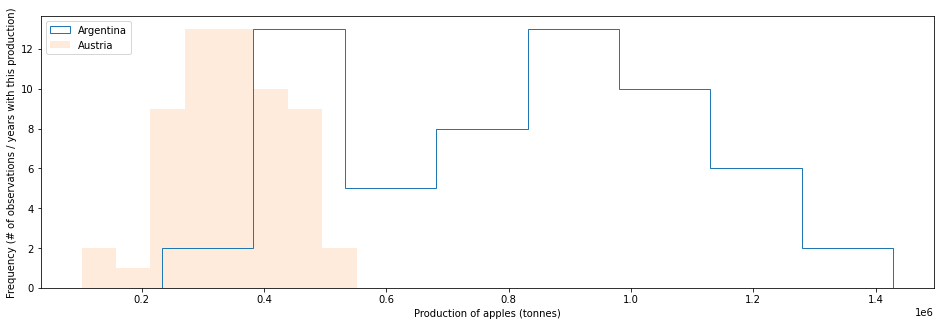

In [8]:
fig, ax = plt.subplots() 

ax.hist(apples_prod.Argentina, label='Argentina', bins=8, histtype='step') 
ax.hist(apples_prod.Austria, label='Austria', bins=8, alpha=0.15) 
# to set bin boundaries instead of setting the number of bins, se bins=[list of x values]

ax.set_xlabel("Production of apples (tonnes)")
ax.set_ylabel("Frequency (# of observations / years with this production)")
ax.legend()

plt.show()

### Error bars

#### To bar plots

No handles with labels found to put in legend.


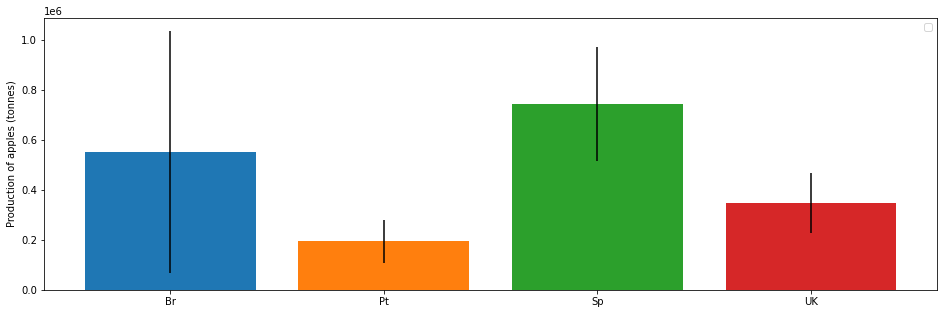

In [9]:
fig, ax = plt.subplots()

# Bar-chart of average production value for each country in the period of the data
ax.bar('Br', df['Br'].mean(), yerr=df['Br'].std())
ax.bar('Pt', df['Pt'].mean(), yerr=df['Pt'].std())
ax.bar('Sp', df['Sp'].mean(), yerr=df['Sp'].std())
ax.bar('UK', df['UK'].mean(), yerr=df['UK'].std())

# Display the legend
ax.legend()
ax.set_ylabel("Production of apples (tonnes)")

plt.show()

#### To  line plots

We need a pandas.series with the same size of the x and y series for that.

This makes sense, for example, to plot apple production in some countries over 5-year periods.

In [10]:
# prepare dataset for that with BR and PT
newdf = df
newdf.index = pd.to_datetime(newdf.index, format='%Y')
newdfm = newdf.resample('5Y').mean()
newdfs = newdf.resample('5Y').std()

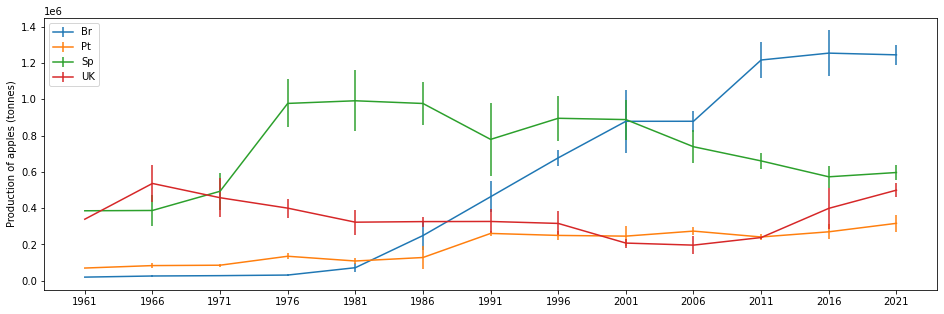

In [11]:
# create lineplots
fig, ax = plt.subplots()

ax.errorbar(newdfm.index, newdfm.Br, yerr=newdfs.Br, label='Br')
ax.errorbar(newdfm.index, newdfm.Pt, yerr=newdfs.Pt, label='Pt')
ax.errorbar(newdfm.index, newdfm.Sp, yerr=newdfs.Sp, label='Sp')
ax.errorbar(newdfm.index, newdfm.UK, yerr=newdfs.UK, label='UK')

ax.legend()
ax.set_ylabel("Production of apples (tonnes)")
ax.set_xticks(newdfm.index) # in the line plot we need to set tick location before customizing them
ax.set_xticklabels(newdfm.index.year)

plt.show()